In [1]:
from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import glob
import os
from os import path
import string
import numpy
import re
from __future__ import absolute_import, division, print_function
import pandas as pd
import multiprocessing
import gensim
import random
from tqdm import tqdm
import pandas as pd
from gensim.models import KeyedVectors
from numpy import array
import matplotlib.pyplot as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
year_interval = 10
range_years = list(range(1815,1906,year_interval))
word1 = "binnenland"
word2 = "rijk"

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


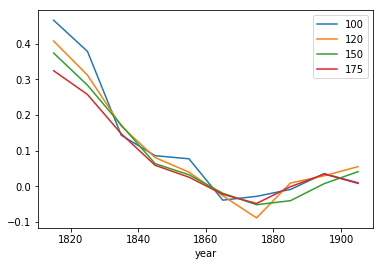

In [3]:
list_scores = dict()

for i in ["100", "120", "150", "175"]:
    dr = "D://Scriptie//Data//models//" + str(year_interval) + "yp_s" + i
   # dr = "D://Scriptie//Data//models//static"
    
    os.chdir(dr)
    list_mod = glob.glob('*.bin')
    
    model_version_list = list()
    
    for year in range_years:
        
        mfn = [m for m in list_mod if int(m[0:4]) == year]
        model = KeyedVectors.load_word2vec_format(mfn[0], binary = True)
        
        tmp = model.similarity(word1, word2)
        model_version_list.append(tmp)
        
    list_scores.update({i:model_version_list})

dfr = pd.DataFrame(list_scores['100'], columns = ['100'])
dfr['120'] = pd.DataFrame(list_scores['120'])
dfr['150'] = pd.DataFrame(list_scores['150'])
dfr['175'] = pd.DataFrame(list_scores['175'])
dfr['year'] = range_years
dfr.plot(x="year", y=["100", "120", "150", '175'], kind="line")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


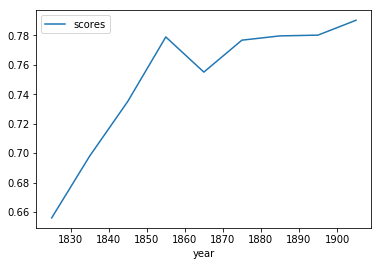

In [5]:
word1 = "buitenlander"
word2 = "verbruiker"
os.chdir("D://Scriptie//Data//models")
list_mod = glob.glob('*w2v')


list_scores = list()

range_years = list(range(1825,1911,10))
    
for year in range_years:
        
    mfn = [m for m in list_mod if int(m[0:4]) == year]
    m = KeyedVectors.load(mfn[0], mmap='r')
        
    tmp = m.similarity(word1, word2)
    list_scores.append(tmp)
    
dfr = pd.DataFrame(list_scores, columns = ['scores'])
dfr['year'] = range_years
dfr.plot(x="year", y=['scores'], kind="line")

In [82]:
os.chdir('C://Users//Ruben//Documents//GitHub//TheForeign//Properties//output-data')
dfr.to_csv('cs_dia_buitenland_beweging.csv')

In [4]:
keyword = "buitenlander"
year_interval = 10
range_years = list(range(1825,1906,year_interval))
listkw = ['handelaar', 'verbruiker', 'europeaan']

list_scores = dict()

for i in listkw:
    dr = "D://Scriptie//Data//models//" + str(year_interval) + "yp_s150"
   # dr = "D://Scriptie//Data//models//static"
    
    os.chdir(dr)
    list_mod = glob.glob('*.bin')
    
    model_version_list = list()
    
    for year in range_years:
        
        mfn = [m for m in list_mod if int(m[0:4]) == year]
        model = KeyedVectors.load_word2vec_format(mfn[0], binary = True)

        tmp = model.similarity(keyword, i)
        model_version_list.append(tmp)
       
        
    list_scores.update({i:model_version_list})

dfr = pd.DataFrame(list_scores[listkw[0]], columns = [listkw[0]])
dfr[listkw[1]] = pd.DataFrame(list_scores[listkw[1]])
dfr[listkw[2]] = pd.DataFrame(list_scores[listkw[2]])
dfr['year'] = range_years
dfr.plot(x="year", y=[listkw[0], listkw[1], listkw[2]], kind="line")

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


KeyError: "word 'verbruiker' not in vocabulary"

In [ ]:
model.most_similar('wereldtooneel')

In [15]:
model = KeyedVectors.load_word2vec_format('1905_w175_10yp_model.bin', binary = True)

In [12]:
model.most_similar('natie')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('onafhankelijkheid', 0.7203452587127686),
 ('volk', 0.6904233694076538),
 ('overheersching', 0.6902848482131958),
 ('democratie', 0.683351993560791),
 ('volksvertegenwoordiging', 0.6725099086761475),
 ('volkeren', 0.6704970002174377),
 ('vaderlandsliefde', 0.6635735034942627),
 ('heerschappij', 0.6451501846313477),
 ('monarchie', 0.6431699991226196),
 ('staatkunde', 0.6413028240203857)]